In [1]:
datos=spark.read.csv("dog_food.csv",header=True,inferSchema=True)

In [2]:
datos.show(),datos.printSchema()

+---+---+----+---+-------+
|  A|  B|   C|  D|Spoiled|
+---+---+----+---+-------+
|  4|  2|12.0|  3|    1.0|
|  5|  6|12.0|  7|    1.0|
|  6|  2|13.0|  6|    1.0|
|  4|  2|12.0|  1|    1.0|
|  4|  2|12.0|  3|    1.0|
| 10|  3|13.0|  9|    1.0|
|  8|  5|14.0|  5|    1.0|
|  5|  8|12.0|  8|    1.0|
|  6|  5|12.0|  9|    1.0|
|  3|  3|12.0|  1|    1.0|
|  9|  8|11.0|  3|    1.0|
|  1| 10|12.0|  3|    1.0|
|  1|  5|13.0| 10|    1.0|
|  2| 10|12.0|  6|    1.0|
|  1| 10|11.0|  4|    1.0|
|  5|  3|12.0|  2|    1.0|
|  4|  9|11.0|  8|    1.0|
|  5|  1|11.0|  1|    1.0|
|  4|  9|12.0| 10|    1.0|
|  5|  8|10.0|  9|    1.0|
+---+---+----+---+-------+
only showing top 20 rows

root
 |-- A: integer (nullable = true)
 |-- B: integer (nullable = true)
 |-- C: double (nullable = true)
 |-- D: integer (nullable = true)
 |-- Spoiled: double (nullable = true)



(None, None)

In [3]:
datos.count()

490

In [4]:
datos.groupBy("Spoiled").count().show()

+-------+-----+
|Spoiled|count|
+-------+-----+
|    0.0|  350|
|    1.0|  140|
+-------+-----+



In [9]:
datosP0=datos.where("Spoiled=0").drop("Spoiled").toPandas()

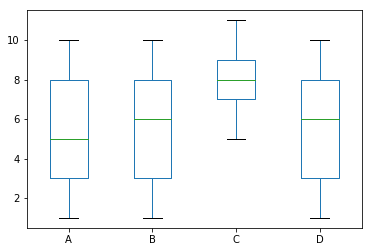

In [10]:
datosP0.plot.box()

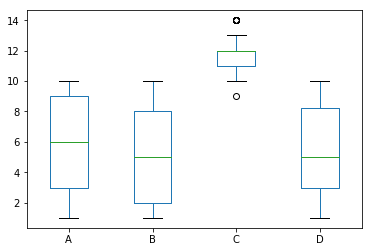

In [11]:
datosP1=datos.where("Spoiled=1").drop("Spoiled").toPandas()
datosP1.plot.box()

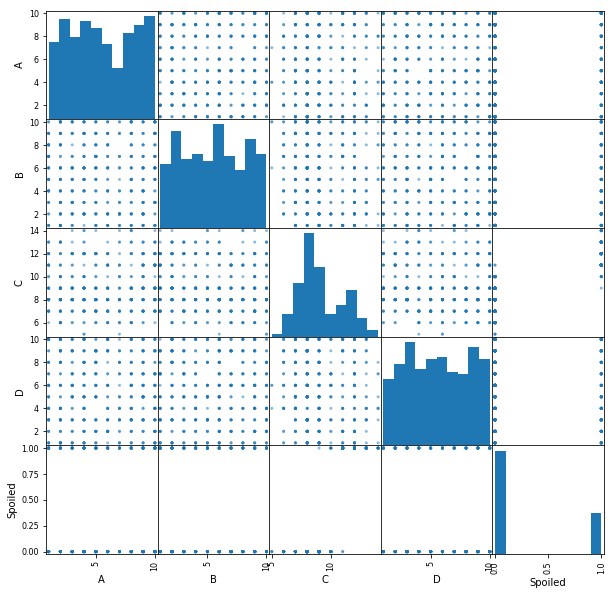

In [13]:
from pandas.plotting import scatter_matrix
a=scatter_matrix(datos.toPandas(),figsize=(10,10))

In [17]:
from pyspark.ml.feature import VectorAssembler
constructor=VectorAssembler(inputCols=["A","B","C","D"],
                            outputCol="features")
datosF=constructor.transform(datos)

In [71]:
entrena,evalua=datosF.randomSplit([0.8,0.2])

In [72]:
from pyspark.ml.classification import (LogisticRegression,
                                       RandomForestClassifier)

In [73]:
#algoritmos
lr=LogisticRegression(labelCol="Spoiled")
rf=RandomForestClassifier(labelCol="Spoiled",numTrees=200)

In [74]:
#modelos entrenados
lrModelo=lr.fit(entrena)
rfModelo=rf.fit(entrena)

In [75]:
#predicciones para evaluar
lrPred=lrModelo.transform(evalua)
rfPred=rfModelo.transform(evalua)

In [76]:
from pyspark.ml.evaluation import (BinaryClassificationEvaluator,
                    MulticlassClassificationEvaluator)

In [77]:
#evaluadores
evalB=BinaryClassificationEvaluator(labelCol="Spoiled")
evalM=MulticlassClassificationEvaluator(labelCol="Spoiled",
                                       metricName="accuracy")

In [78]:
#evaluación
evalB.evaluate(lrPred),evalB.evaluate(rfPred)

(0.9984126984126984, 0.9888888888888889)

In [79]:
evalM.evaluate(lrPred),evalM.evaluate(rfPred)

(0.9824561403508771, 0.9824561403508771)

In [81]:
lrModelo=lr.fit(datosF)
rfModelo=rf.fit(datosF)

In [83]:
lrModelo.coefficients

DenseVector([-0.1349, -0.1067, 4.3961, -0.213])

In [84]:
rfModelo.featureImportances

SparseVector(4, {0: 0.02, 1: 0.021, 2: 0.9365, 3: 0.0226})

In [87]:
datos.where("Spoiled=0").select("C").summary().show()

+-------+-----------------+
|summary|                C|
+-------+-----------------+
|  count|              350|
|   mean| 8.01142857142857|
| stddev|1.086455140730764|
|    min|              5.0|
|    25%|              7.0|
|    50%|              8.0|
|    75%|              9.0|
|    max|             11.0|
+-------+-----------------+



In [88]:
datos.where("Spoiled=1").select("C").summary().show()

+-------+------------------+
|summary|                 C|
+-------+------------------+
|  count|               140|
|   mean|11.914285714285715|
| stddev|0.9706907300060253|
|    min|               9.0|
|    25%|              11.0|
|    50%|              12.0|
|    75%|              12.0|
|    max|              14.0|
+-------+------------------+



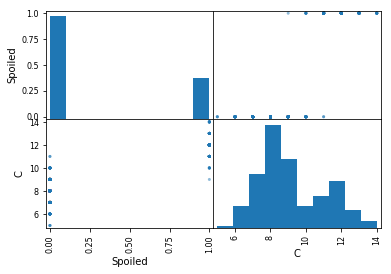

In [90]:
a=scatter_matrix(datos.select("Spoiled","C").toPandas())